### Adapted from Coursera Deep Learning Speciality: Improving Deep Neural Networks: Hyperparameter tuning, Regularization and Optimization
   
#### offered by deeplearning.ai

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tfshallow import io
from tfshallow.models import model
from tfshallow.predict import predict
import scipy
from PIL import Image
from scipy import ndimage
import imageio

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = io.load_dataset()

In [4]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = io.convert_to_one_hot(Y_train_orig, 6)
Y_test = io.convert_to_one_hot(Y_test_orig, 6)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)
Y_train = Y_train.astype(np.float32)
Y_test = Y_test.astype(np.float32)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


y = 2


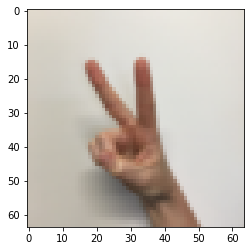

In [5]:
#Example of a picture
index = 4
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.




Cost after epoch 0: 1.913693
Cost after epoch 100: 1.049044
Cost after epoch 200: 0.756096
Cost after epoch 300: 0.590979
Cost after epoch 400: 0.483216
Cost after epoch 500: 0.393141
Cost after epoch 600: 0.323603
Cost after epoch 700: 0.261634
Cost after epoch 800: 0.210259
Cost after epoch 900: 0.171649
Cost after epoch 1000: 0.151277
Cost after epoch 1100: 0.110638
Cost after epoch 1200: 0.089309
Cost after epoch 1300: 0.061195
Cos

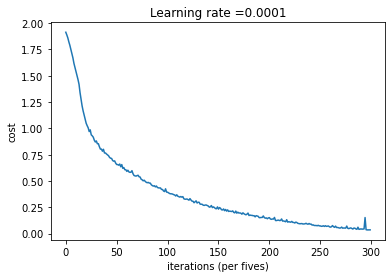

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [6]:
parameters = model(X_train, Y_train, X_test, Y_test)


/opt/anaconda3/envs/tfshallow/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning:     `imresize` is deprecated!
    `imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
    Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


Your algorithm predicts: y = 3


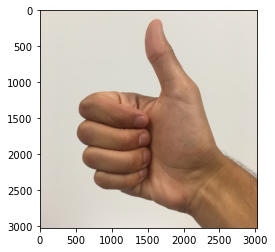

In [7]:
my_image = "thumbs_up.jpg"

#preprocess image to fit algorithm.
fname = "../images/" + my_image
image = np.array(imageio.imread(fname))
image = image/255.
my_image = scipy.misc.imresize(image, size=(64,64)).reshape((1, 64*64*3)).T
my_image_prediction = predict(my_image, parameters)

plt.imshow(image)
print("Your algorithm predicts: y = " + str(np.squeeze(my_image_prediction)))
